<a href="https://colab.research.google.com/github/rajprashant84/CF969_Big_Data_for_Computational_Finance/blob/main/Lab_7_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7 - Regularisation
In the previous week, we visited an example of underfitting/overfitting. Let's continue on that and see the impact of regularisation (in this case, weight decay) on the performance of regression.

Recall that weight decay adds an extra term in the Mean Squared Error (MSE) function. In the lecture, we discussed the case where the extra term is $\lambda\sum_i{w_i^2}$ where $\lambda$ is a regularisation hyperparameter and denotes how important it is to have small weights. This is also known as **L2 regression**. Another case is when the extra term is $\lambda\sum_i{|w_i|}$; this is called **L1 regression**. 

In both cases, a value of $\lambda=0$ gives the actual MSE function, while a large value for $\lambda$ implies that having small weights is really important to us.

The first snippets below are (almost) identical to those in Lab 6.

In [1]:
# We import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

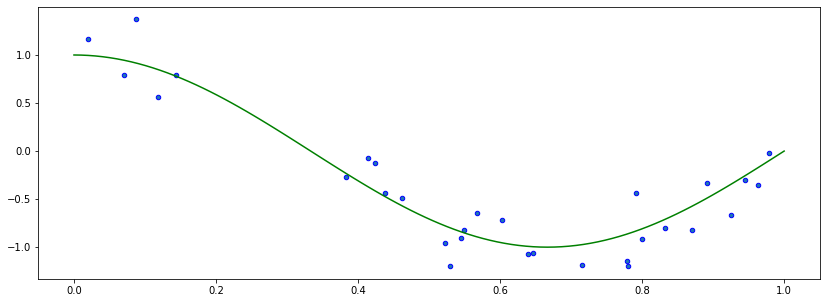

In [2]:
# we define the true function
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# let's initialise our data. We will create 20 data points that come from the true function, but with the addition of some noise

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15] #the three choices for the polynomial degrees

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.2
X = X[:, np.newaxis]
y = y[:, np.newaxis]

X_test = np.linspace(0, 1, 100)

plt.figure(figsize=(14, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X_test,true_fun(X_test), color='g', label="True function")
plt.show()

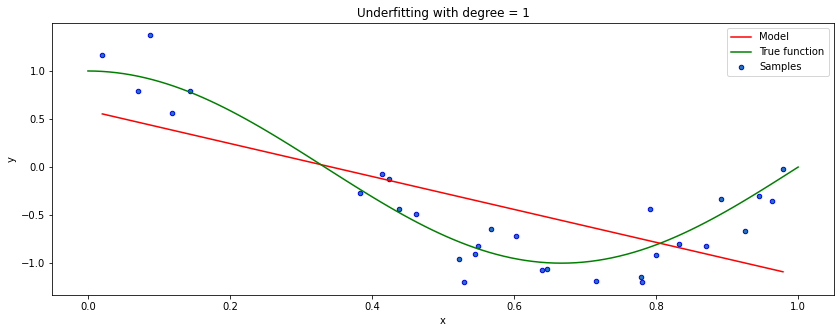

In [3]:
# Here we take care of plotting the three cases, for different degrees (1, 4, 15)
polynomial_features = PolynomialFeatures(1) # First case, degree = 1
X_poly = polynomial_features.fit_transform(X)

linear_regression = LinearRegression()
linear_regression.fit(X_poly, y)
y_pred = linear_regression.predict(X_poly)

plt.figure(figsize=(14, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X,y_pred, color='r', label="Model")
plt.plot(X_test,true_fun(X_test), color='g', label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Underfitting with degree = 1")
plt.legend(loc="best")
plt.show()

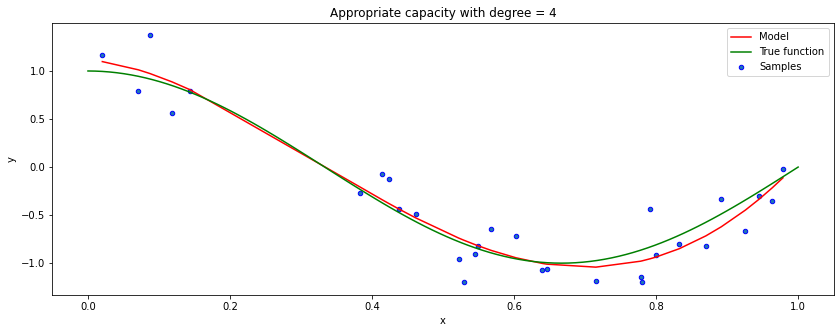

In [4]:
polynomial_features = PolynomialFeatures(4) # Second case, degree = 4
X_poly = polynomial_features.fit_transform(X)

linear_regression = LinearRegression()
linear_regression.fit(X_poly, y)
y_pred = linear_regression.predict(X_poly)

plt.figure(figsize=(14, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X,y_pred, color='r', label="Model")
plt.plot(X_test,true_fun(X_test), color='g', label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Appropriate capacity with degree = 4")
plt.legend(loc="best")
plt.show()

[[ 0.00000000e+00 -5.96588862e+03  2.07810807e+05 -3.74833876e+06
   4.07433997e+07 -2.89747829e+08  1.41863701e+09 -4.94133811e+09
   1.24912786e+10 -2.31354113e+10  3.13791390e+10 -3.08013576e+10
   2.12915611e+10 -9.82760181e+09  2.71840741e+09 -3.40763433e+08]]


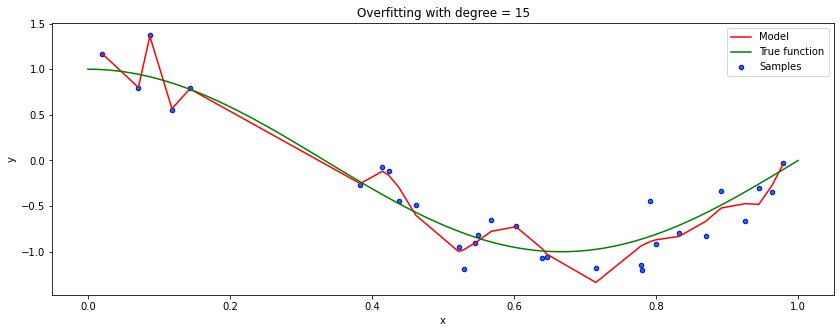

In [5]:
polynomial_features = PolynomialFeatures(15) # Last case, degree = 15
X_poly = polynomial_features.fit_transform(X)
linear_regression = LinearRegression()
linear_regression.fit(X_poly, y)
y_pred = linear_regression.predict(X_poly)

# Let's print the weights
print(linear_regression.coef_)

plt.figure(figsize=(14, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X,y_pred, color='r', label="Model")
plt.plot(X_test,true_fun(X_test), color='g', label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Overfitting with degree = 15")
plt.legend(loc="best")
plt.show()

Let's now bring regularisation into play. Parameter alpha below is the regularisation hyperparameter $\lambda$ in our model. What happens when alpha is small? What happens when it is large, let's say 100? Are there cases where a value is small for L2 but too large for L1?

We now also print the weights, so that it is easier to compare to the case where $\lambda=0$, which corresponds to no regularisation.

L2 weights:  [[ 0.         -3.39890392 -1.32355296  0.26594334  1.00886953  1.17248112
   1.02388669  0.74550691  0.44409074  0.17465555 -0.03911496 -0.19099602
  -0.28371539 -0.32406426 -0.32022939 -0.28041627]]
L1 weights:  [ 0.         -3.14290065 -0.          0.          0.          0.
  2.14059172  0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


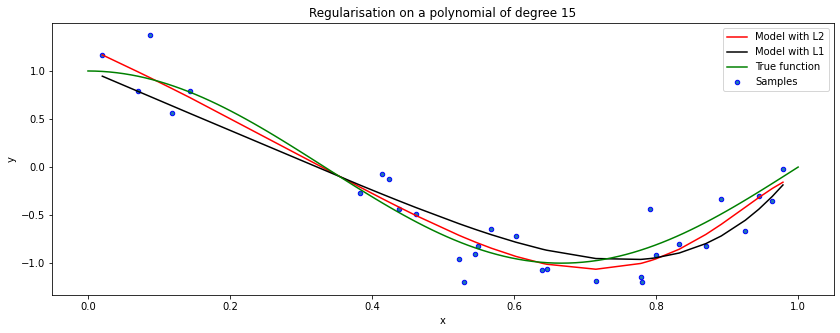

In [6]:
from sklearn import linear_model

# L2 regression
l2_regression = linear_model.Ridge(alpha=0.01)
l2_regression.fit(X_poly, y)
y2_pred = l2_regression.predict(X_poly)

# L1 regression
l1_regression = linear_model.Lasso(alpha=0.01)
l1_regression.fit(X_poly, y)
y1_pred = l1_regression.predict(X_poly)


# Let's print the weights
print("L2 weights: ", l2_regression.coef_)
print("L1 weights: ", l1_regression.coef_)


plt.figure(figsize=(14, 5))
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X,y2_pred, color='r', label="Model with L2")
plt.plot(X,y1_pred, color='k', label="Model with L1")
plt.plot(X_test,true_fun(X_test), color='g', label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regularisation on a polynomial of degree 15")
plt.legend(loc="best")
plt.show()